# Task
This is a temporal data for State-transition Modeling of Blood Transcriptome Predicts Disease Evolution and Treatment Response in Chronic Myeloid Leukemia on mouse.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/bioinformatics')
!pwd

/content/drive/My Drive/bioinformatics


# load data

In [ ]:
import pandas as pd
# downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi GSE244990

data = pd.read_csv('GSE244990_cml_mrna_processed_1tpm_in_5_samples.tsv')
display(data.head())

,Unnamed: 0,COHP_44940,COHP_44941,COHP_44942,COHP_44943,COHP_44944,COHP_44945,COHP_44946,COHP_44947,COHP_44948,...,COHP_49266,COHP_49267,COHP_49268,COHP_49269,COHP_49270,COHP_49271,COHP_49272,COHP_49273,COHP_49274,COHP_49275
0,ENSMUSG00000000001.5,36.689417,6.569745,22.737372,14.620736,20.601435,15.586120,13.308435,13.578346,12.658770,...,6.060194,4.331022,11.091597,17.667642,14.614636,14.407948,9.954993,20.991216,17.514263,31.190937
1,ENSMUSG00000000028.16,1.508735,0.205681,0.722628,0.653822,0.497371,0.736454,0.423647,0.427324,0.459915,...,0.215577,0.080105,0.235866,0.706430,0.525122,0.476212,0.292371,0.402099,0.429077,0.852256
2,ENSMUSG00000000056.8,18.698059,7.798914,13.797213,10.756160,12.118027,11.646558,8.174061,11.097026,8.475239,...,4.336889,4.617319,5.337551,7.093304,6.623038,6.571075,5.069505,11.400310,9.042525,6.174895
3,ENSMUSG00000000078.8,104.745359,13.834491,72.965109,47.771409,63.728690,66.009305,42.860824,49.885084,39.696014,...,13.048697,8.707692,28.974593,48.805662,33.586558,34.308565,20.126866,46.142431,34.447496,68.937908
4,ENSMUSG00000000085.17,15.168972,2.944192,6.548981,3.458509,6.563647,4.272482,3.700864,3.173428,4.167721,...,1.900638,1.286319,1.871375,2.670667,2.635146,2.943296,2.778221,4.458461,3.862526,3.377065


Data Exploration and Analysis

In [ ]:
data.shape

(14605, 299)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Columns: 299 entries, Unnamed: 0 to COHP_49275
dtypes: float64(298), object(1)
memory usage: 33.3+ MB


In [ ]:
data.columns

Index(['Unnamed: 0', 'COHP_44940', 'COHP_44941', 'COHP_44942', 'COHP_44943',
       'COHP_44944', 'COHP_44945', 'COHP_44946', 'COHP_44947', 'COHP_44948',
       ...
       'COHP_49266', 'COHP_49267', 'COHP_49268', 'COHP_49269', 'COHP_49270',
       'COHP_49271', 'COHP_49272', 'COHP_49273', 'COHP_49274', 'COHP_49275'],
      dtype='object', length=299)

Transposing the dataframe to bring the strains as features and the time period as Rows where we will index based on week for curating data suitable for forecasting and imputation


In [ ]:
data.rename(columns={'Unnamed: 0': 'Gene_ID'}, inplace=True)
data.columns

Index(['Gene_ID', 'COHP_44940', 'COHP_44941', 'COHP_44942', 'COHP_44943',
       'COHP_44944', 'COHP_44945', 'COHP_44946', 'COHP_44947', 'COHP_44948',
       ...
       'COHP_49266', 'COHP_49267', 'COHP_49268', 'COHP_49269', 'COHP_49270',
       'COHP_49271', 'COHP_49272', 'COHP_49273', 'COHP_49274', 'COHP_49275'],
      dtype='object', length=299)

In [ ]:
df_long = data.T.reset_index()
df_long.head()

,index,0,1,2,3,4,5,6,7,8,...,14595,14596,14597,14598,14599,14600,14601,14602,14603,14604
0,Gene_ID,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,...,ENSMUSG00002076937.1,ENSMUSG00002076954.1,ENSMUSG00002076958.1,ENSMUSG00002076971.1,ENSMUSG00002076983.1,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene
1,COHP_44940,36.689417,1.508735,18.698059,104.745359,15.168972,115.771668,1.813523,3.903727,61.209814,...,71.864309,0.662182,0.0,0.0,0.799692,0.0,0.044367,0.37111,0.008689,0.0
2,COHP_44941,6.569745,0.205681,7.798914,13.834491,2.944192,110.091337,0.193593,2.79477,6.113242,...,4.126586,0.0,0.0,0.0,0.0,0.0,0.27871,0.0,0.172006,0.0
3,COHP_44942,22.737372,0.722628,13.797213,72.965109,6.548981,113.967614,0.799231,3.178091,43.864831,...,7.656471,0.353771,0.0,0.0,1.478118,0.0,0.430299,1.453523,0.154966,0.0
4,COHP_44943,14.620736,0.653822,10.75616,47.771409,3.458509,58.964527,0.647613,1.251343,20.497874,...,39.415728,0.0,0.0,0.0,0.612412,0.0,0.873972,0.367892,0.416323,0.003507


In [ ]:
df_long.iloc[0]

,0
index,Gene_ID
0,ENSMUSG00000000001.5
1,ENSMUSG00000000028.16
2,ENSMUSG00000000056.8
3,ENSMUSG00000000078.8
...,...
14600,ENSMUSG00002076986.1
14601,HSA_ABL1_gene
14602,HSA_BCR_ABL1_gene
14603,HSA_BCR_gene


In [ ]:
df_long.columns = df_long.iloc[0]
df_long.head()

,Gene_ID,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,...,ENSMUSG00002076937.1,ENSMUSG00002076954.1,ENSMUSG00002076958.1,ENSMUSG00002076971.1,ENSMUSG00002076983.1,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene
0,Gene_ID,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,...,ENSMUSG00002076937.1,ENSMUSG00002076954.1,ENSMUSG00002076958.1,ENSMUSG00002076971.1,ENSMUSG00002076983.1,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene
1,COHP_44940,36.689417,1.508735,18.698059,104.745359,15.168972,115.771668,1.813523,3.903727,61.209814,...,71.864309,0.662182,0.0,0.0,0.799692,0.0,0.044367,0.37111,0.008689,0.0
2,COHP_44941,6.569745,0.205681,7.798914,13.834491,2.944192,110.091337,0.193593,2.79477,6.113242,...,4.126586,0.0,0.0,0.0,0.0,0.0,0.27871,0.0,0.172006,0.0
3,COHP_44942,22.737372,0.722628,13.797213,72.965109,6.548981,113.967614,0.799231,3.178091,43.864831,...,7.656471,0.353771,0.0,0.0,1.478118,0.0,0.430299,1.453523,0.154966,0.0
4,COHP_44943,14.620736,0.653822,10.75616,47.771409,3.458509,58.964527,0.647613,1.251343,20.497874,...,39.415728,0.0,0.0,0.0,0.612412,0.0,0.873972,0.367892,0.416323,0.003507


In [ ]:
df_long = df_long.drop(df_long.index[0])
df_long.head()

,Gene_ID,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,...,ENSMUSG00002076937.1,ENSMUSG00002076954.1,ENSMUSG00002076958.1,ENSMUSG00002076971.1,ENSMUSG00002076983.1,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene
1,COHP_44940,36.689417,1.508735,18.698059,104.745359,15.168972,115.771668,1.813523,3.903727,61.209814,...,71.864309,0.662182,0.0,0.0,0.799692,0.0,0.044367,0.37111,0.008689,0.0
2,COHP_44941,6.569745,0.205681,7.798914,13.834491,2.944192,110.091337,0.193593,2.79477,6.113242,...,4.126586,0.0,0.0,0.0,0.0,0.0,0.27871,0.0,0.172006,0.0
3,COHP_44942,22.737372,0.722628,13.797213,72.965109,6.548981,113.967614,0.799231,3.178091,43.864831,...,7.656471,0.353771,0.0,0.0,1.478118,0.0,0.430299,1.453523,0.154966,0.0
4,COHP_44943,14.620736,0.653822,10.75616,47.771409,3.458509,58.964527,0.647613,1.251343,20.497874,...,39.415728,0.0,0.0,0.0,0.612412,0.0,0.873972,0.367892,0.416323,0.003507
5,COHP_44944,20.601435,0.497371,12.118027,63.72869,6.563647,126.412502,0.847213,2.985434,31.750911,...,16.515778,0.342676,0.0,0.0,0.0,1.270444,1.245521,0.930028,0.597472,0.0


In [ ]:
df_long.rename(columns={'Gene_ID': 'Rec_Timestep'}, inplace=True)


In [ ]:
df_long.head()

,Rec_Timestep,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,...,ENSMUSG00002076937.1,ENSMUSG00002076954.1,ENSMUSG00002076958.1,ENSMUSG00002076971.1,ENSMUSG00002076983.1,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene
1,COHP_44940,36.689417,1.508735,18.698059,104.745359,15.168972,115.771668,1.813523,3.903727,61.209814,...,71.864309,0.662182,0.0,0.0,0.799692,0.0,0.044367,0.37111,0.008689,0.0
2,COHP_44941,6.569745,0.205681,7.798914,13.834491,2.944192,110.091337,0.193593,2.79477,6.113242,...,4.126586,0.0,0.0,0.0,0.0,0.0,0.27871,0.0,0.172006,0.0
3,COHP_44942,22.737372,0.722628,13.797213,72.965109,6.548981,113.967614,0.799231,3.178091,43.864831,...,7.656471,0.353771,0.0,0.0,1.478118,0.0,0.430299,1.453523,0.154966,0.0
4,COHP_44943,14.620736,0.653822,10.75616,47.771409,3.458509,58.964527,0.647613,1.251343,20.497874,...,39.415728,0.0,0.0,0.0,0.612412,0.0,0.873972,0.367892,0.416323,0.003507
5,COHP_44944,20.601435,0.497371,12.118027,63.72869,6.563647,126.412502,0.847213,2.985434,31.750911,...,16.515778,0.342676,0.0,0.0,0.0,1.270444,1.245521,0.930028,0.597472,0.0


In [ ]:

df_long = df_long.set_index('Rec_Timestep')
df_long.head()


,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,ENSMUSG00000000134.18,...,ENSMUSG00002076937.1,ENSMUSG00002076954.1,ENSMUSG00002076958.1,ENSMUSG00002076971.1,ENSMUSG00002076983.1,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene
Rec_Timestep,,,,,,,,,,,,,,,,,,,,,
COHP_44940,36.689417,1.508735,18.698059,104.745359,15.168972,115.771668,1.813523,3.903727,61.209814,15.502568,...,71.864309,0.662182,0.0,0.0,0.799692,0.0,0.044367,0.37111,0.008689,0.0
COHP_44941,6.569745,0.205681,7.798914,13.834491,2.944192,110.091337,0.193593,2.79477,6.113242,2.056908,...,4.126586,0.0,0.0,0.0,0.0,0.0,0.27871,0.0,0.172006,0.0
COHP_44942,22.737372,0.722628,13.797213,72.965109,6.548981,113.967614,0.799231,3.178091,43.864831,11.651372,...,7.656471,0.353771,0.0,0.0,1.478118,0.0,0.430299,1.453523,0.154966,0.0
COHP_44943,14.620736,0.653822,10.75616,47.771409,3.458509,58.964527,0.647613,1.251343,20.497874,8.503088,...,39.415728,0.0,0.0,0.0,0.612412,0.0,0.873972,0.367892,0.416323,0.003507
COHP_44944,20.601435,0.497371,12.118027,63.72869,6.563647,126.412502,0.847213,2.985434,31.750911,11.501471,...,16.515778,0.342676,0.0,0.0,0.0,1.270444,1.245521,0.930028,0.597472,0.0


In [ ]:
df_long.shape

(298, 14605)

In [ ]:
df_long.isnull().sum()

,0
0,
ENSMUSG00000000001.5,0
ENSMUSG00000000028.16,0
ENSMUSG00000000056.8,0
ENSMUSG00000000078.8,0
ENSMUSG00000000085.17,0
...,...
ENSMUSG00002076986.1,0
HSA_ABL1_gene,0
HSA_BCR_ABL1_gene,0


In [ ]:
df_long.columns.unique()

Index(['ENSMUSG00000000001.5', 'ENSMUSG00000000028.16', 'ENSMUSG00000000056.8',
       'ENSMUSG00000000078.8', 'ENSMUSG00000000085.17', 'ENSMUSG00000000088.8',
       'ENSMUSG00000000120.7', 'ENSMUSG00000000127.16',
       'ENSMUSG00000000131.16', 'ENSMUSG00000000134.18',
       ...
       'ENSMUSG00002076937.1', 'ENSMUSG00002076954.1', 'ENSMUSG00002076958.1',
       'ENSMUSG00002076971.1', 'ENSMUSG00002076983.1', 'ENSMUSG00002076986.1',
       'HSA_ABL1_gene', 'HSA_BCR_ABL1_gene', 'HSA_BCR_gene', 'HSA_MYH11_gene'],
      dtype='object', name=0, length=14605)

In [ ]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, COHP_44940 to COHP_49275
Columns: 14605 entries, ENSMUSG00000000001.5 to HSA_MYH11_gene
dtypes: object(14605)
memory usage: 33.2+ MB


# load mapping and merge

In [ ]:
mapping_data = pd.read_csv('mapping.csv', delimiter=',')
mapping_data.head(10)

,Original_Identifier,GSM,COHP,SampleID,TET_Status,Group,Week
0,GSM7833410COHP_44940_480_TET_OFF_B_0wks,GSM7833410,COHP_44940,480,TET_OFF,B,0
1,GSM7833411COHP_44941_480_TET_OFF_B_1wks,GSM7833411,COHP_44941,480,TET_OFF,B,1
2,GSM7833412COHP_44942_480_TET_OFF_B_2wks,GSM7833412,COHP_44942,480,TET_OFF,B,2
3,GSM7833413COHP_44943_480_TET_OFF_B_3wks,GSM7833413,COHP_44943,480,TET_OFF,B,3
4,GSM7833414COHP_44944_480_TET_OFF_B_4wks,GSM7833414,COHP_44944,480,TET_OFF,B,4
5,GSM7833415COHP_44945_480_TET_OFF_B_5wks,GSM7833415,COHP_44945,480,TET_OFF,B,5
6,GSM7833416COHP_44946_480_TET_OFF_B_6wks,GSM7833416,COHP_44946,480,TET_OFF,B,6
7,GSM7833417COHP_44947_480_TET_OFF_B_7wks,GSM7833417,COHP_44947,480,TET_OFF,B,7
8,GSM7833418COHP_44948_480_TET_OFF_B_8wks,GSM7833418,COHP_44948,480,TET_OFF,B,8
9,GSM7833419COHP_44949_480_TET_OFF_B_9wks,GSM7833419,COHP_44949,480,TET_OFF,B,9


In [ ]:
import pandas as pd


metadata_subset = mapping_data[['COHP', 'Week', 'TET_Status', 'Group','SampleID']].copy()

df_final= pd.merge(df_long, metadata_subset,
                     left_on='Rec_Timestep',
                     right_on='COHP',
                     how='inner')

print("Any missing metadata after merge?", df_final[['Week', 'TET_Status', 'Group']].isnull().any())

#df_merged.drop(columns=['COHP', 'Rec_Timestep'], inplace=True, errors='ignore')

#df_final = df_merged.set_index('Week').sort_index()


Any missing metadata after merge? Week          False
TET_Status    False
Group         False
dtype: bool


In [ ]:
df_final.head()

,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,ENSMUSG00000000134.18,...,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene,COHP,Week,TET_Status,Group,SampleID
0,36.689417,1.508735,18.698059,104.745359,15.168972,115.771668,1.813523,3.903727,61.209814,15.502568,...,0.0,0.044367,0.37111,0.008689,0.0,COHP_44940,0,TET_OFF,B,480
1,6.569745,0.205681,7.798914,13.834491,2.944192,110.091337,0.193593,2.79477,6.113242,2.056908,...,0.0,0.27871,0.0,0.172006,0.0,COHP_44941,1,TET_OFF,B,480
2,22.737372,0.722628,13.797213,72.965109,6.548981,113.967614,0.799231,3.178091,43.864831,11.651372,...,0.0,0.430299,1.453523,0.154966,0.0,COHP_44942,2,TET_OFF,B,480
3,14.620736,0.653822,10.75616,47.771409,3.458509,58.964527,0.647613,1.251343,20.497874,8.503088,...,0.0,0.873972,0.367892,0.416323,0.003507,COHP_44943,3,TET_OFF,B,480
4,20.601435,0.497371,12.118027,63.72869,6.563647,126.412502,0.847213,2.985434,31.750911,11.501471,...,1.270444,1.245521,0.930028,0.597472,0.0,COHP_44944,4,TET_OFF,B,480


In [ ]:
df_final = df_final.rename(columns={'SampleID':'mouse_id'}).drop(columns=['COHP','TET_Status'])
df_final.head()

,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,ENSMUSG00000000134.18,...,ENSMUSG00002076971.1,ENSMUSG00002076983.1,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene,Week,Group,mouse_id
0,36.689417,1.508735,18.698059,104.745359,15.168972,115.771668,1.813523,3.903727,61.209814,15.502568,...,0.0,0.799692,0.0,0.044367,0.37111,0.008689,0.0,0,B,480
1,6.569745,0.205681,7.798914,13.834491,2.944192,110.091337,0.193593,2.79477,6.113242,2.056908,...,0.0,0.0,0.0,0.27871,0.0,0.172006,0.0,1,B,480
2,22.737372,0.722628,13.797213,72.965109,6.548981,113.967614,0.799231,3.178091,43.864831,11.651372,...,0.0,1.478118,0.0,0.430299,1.453523,0.154966,0.0,2,B,480
3,14.620736,0.653822,10.75616,47.771409,3.458509,58.964527,0.647613,1.251343,20.497874,8.503088,...,0.0,0.612412,0.0,0.873972,0.367892,0.416323,0.003507,3,B,480
4,20.601435,0.497371,12.118027,63.72869,6.563647,126.412502,0.847213,2.985434,31.750911,11.501471,...,0.0,0.0,1.270444,1.245521,0.930028,0.597472,0.0,4,B,480


In [ ]:
df_final.to_csv('final_data.csv')

In [ ]:
!pwd

/content/drive/MyDrive/bioinformatics


# Final data viz

In [ ]:
import pandas as pd
df_final = pd.read_csv('final_data.csv')

In [ ]:
df_final.head()

,Unnamed: 0,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,...,ENSMUSG00002076971.1,ENSMUSG00002076983.1,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene,Week,Group,mouse_id
0,0,36.689417,1.508735,18.698059,104.745359,15.168972,115.771668,1.813523,3.903727,61.209814,...,0.0,0.799692,0.000000,0.044367,0.371110,0.008689,0.000000,0,B,480
1,1,6.569745,0.205681,7.798914,13.834491,2.944192,110.091337,0.193593,2.794770,6.113242,...,0.0,0.000000,0.000000,0.278710,0.000000,0.172006,0.000000,1,B,480
2,2,22.737372,0.722628,13.797213,72.965109,6.548981,113.967614,0.799231,3.178091,43.864831,...,0.0,1.478118,0.000000,0.430299,1.453523,0.154966,0.000000,2,B,480
3,3,14.620736,0.653822,10.756160,47.771409,3.458509,58.964527,0.647613,1.251343,20.497874,...,0.0,0.612412,0.000000,0.873972,0.367892,0.416323,0.003507,3,B,480
4,4,20.601435,0.497371,12.118027,63.728690,6.563647,126.412502,0.847213,2.985434,31.750911,...,0.0,0.000000,1.270444,1.245521,0.930028,0.597472,0.000000,4,B,480


In [ ]:
df_final.columns

NameError: name 'df_final' is not defined

In [ ]:
df_final['Group'].unique()

array(['B', 'C', 'A', 'D'], dtype=object)

In [ ]:
df_final['Week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [ ]:
len(df_final['mouse_id'].unique())

20

In [ ]:
df_final.shape

(298, 14609)

In [ ]:
week = df_final.groupby('Week')
week.groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [ ]:
groups_of_interest = ['A', 'B', 'C', 'D']

for key in week.groups.keys():
    w = week.get_group(key)
    print(f"--- For week {key} ---")

    # Show counts by group
    print("Group counts:")
    print(w.groupby(['Group']).size().reset_index(name='count'))

    # Print mouse IDs for each group of interest
    for g in groups_of_interest:
        group_rows = w[w['Group'] == g]
        print(f"\nMouse IDs for group {g}:")
        if not group_rows.empty:
            print(group_rows['mouse_id'].unique())
        else:
            print(f"No mice in group {g} for this week.")

    print("\n" + "-"*40 + "\n")

--- For week 0 ---
Group counts:
  Group  count
0     A      4
1     B      6
2     C      3
3     D      7

Mouse IDs for group A:
[476 482 483 545]

Mouse IDs for group B:
[480 541 484 477 487 542]

Mouse IDs for group C:
[489 490 488]

Mouse IDs for group D:
[502 512 507 508 514 511 513]

----------------------------------------

--- For week 1 ---
Group counts:
  Group  count
0     A      4
1     B      6
2     C      3
3     D      7

Mouse IDs for group A:
[476 482 483 545]

Mouse IDs for group B:
[480 541 484 477 487 542]

Mouse IDs for group C:
[489 490 488]

Mouse IDs for group D:
[502 512 507 508 514 511 513]

----------------------------------------

--- For week 2 ---
Group counts:
  Group  count
0     A      4
1     B      6
2     C      3
3     D      7

Mouse IDs for group A:
[476 482 483 545]

Mouse IDs for group B:
[480 541 484 477 487 542]

Mouse IDs for group C:
[489 490 488]

Mouse IDs for group D:
[502 512 507 508 514 511 513]

-------------------------------------

This is longitudinal gene expression data from a mouse model of Chronic Myeloid Leukemia (CML), tracking disease progression and treatment response over time.

*There is a clear one on one mapping between test status and groups:*
| TET_Status     | Group |
|-----------------|--------|
| TET_OFF         | B      |
| TET_OFF_NIL_ON  | D      |
| TET_OFF_ON      | A      |
| TET_ON          | C      |

## Group Definitions

**A: TET_OFF_ON (TOTO cohort)**  
- **BCR-ABL expression:** Initially OFF (induced), then turned ON (suppressed)  
- **Treatment:** Simulates "best-case scenario" treatment  
- **Purpose:** Tests what happens when you completely remove the driving oncogene after disease development  

**B: TET_OFF (CML cohort)**  
- **BCR-ABL expression:** Continuously OFF (induced)  
- **Treatment:** No suppression - disease develops freely  
- **Purpose:** Serves as the disease control group - shows natural CML progression  

**C: TET_ON (Control cohort)**  
- **BCR-ABL expression:** Continuously ON (suppressed)  
- **Treatment:** No disease induction  
- **Purpose:** Healthy control group - shows baseline gene expression without CML  

**D: TET_OFF_NIL_ON (TKI cohort)**  
- **BCR-ABL expression:** Continuously OFF (induced)  
- **Treatment:** Nilotinib (TKI drug) treatment for 4 weeks  
- **Purpose:** Simulates clinical TKI treatment - tests drug response while oncogene remains active  

---

## Experimental Logic

The groups test different scenarios:  

- **Group B vs C:** Disease vs Healthy  
- **Group A vs B:** Complete oncogene removal vs ongoing expression  
- **Group D vs B:** Drug treatment vs no treatment (with ongoing oncogene expression)

### Analogy:

| Group   | TET Status       | What it Means (In Simple Terms) | The "Factory" Analogy |
|---------|-----------------|--------------------------------|----------------------|
| B       | TET_OFF         | The Disease Group. The switch is left OFF, so the corrupted BCR-ABL command is always active. The mouse gets leukemia and we watch it progress naturally. | The malicious code is always running. The printer is going haywire, and we're just watching it happen. |
| C       | TET_ON          | The Healthy Control Group. The switch is left ON, so the BCR-ABL command is permanently disabled. The mouse stays healthy. This is our "baseline normal." | The master switch is flipped to "safe mode." The malicious code can't run. The factory operates normally. |
| A       | TET_OFF_ON      | The "Ideal Cure" Group. First, they flip the switch OFF to let the cancer start growing. Then, after a while, they flip the switch back ON to see if turning off the BCR-ABL command cures the cancer. | Let the printer go haywire for a bit, then try to fix it by flipping the master switch to "safe mode." Does the printer stop and go back to normal? |
| D       | TET_OFF_NIL_ON  | The "Real-World Drug" Group. The switch is left OFF (cancer is growing), but they give the mouse a drug called Nilotinib. This drug doesn't flip the master switch; it works by jamming the printer's output tray. The corrupted command is still running, but the drug blocks its effects. | The malicious code is still running, but we've put a physical block in the printer to stop the paper from coming out. This simulates how we treat human patients with drugs. |

## Observations

| Group | Mouse IDs Missing / Weeks Disappeared |
|-------|--------------------------------------|
| A     | intermittent missing: 476, 482, 483, 545 (week 9, 13, 17) |
| B     | 484 (after week 7), 542 (after week 16) |
| C     | None |
| D     | 514 (after week 11), 511 (after week 12), 508 (after week 13), all gone by week 17 |

⚠️ Note  
- For Group A, there are weeks where all mice temporarily disappear (e.g., week 9, 13, 17), but they reappear later. This might indicate missing records or skipped measurements, not actual death, because the same mouse IDs return.

### Why is human gene added into the mix:
The researchers added measurements for the human versions of the most important genes in the study. These are called "orthologs" - genes in different species that evolved from a common ancestor and typically retain the same function.

| Human Gene        | Why It's Included |
|------------------|------------------|
| HSA_BCR_ABL1_gene | 0.0 = Healthy, >0.0 = Diseased, Higher = Worse cancer|
| HSA_ABL1_gene     |  present in healthy & sick |
| HSA_BCR_gene      |  present in healthy & sick |
| HSA_MYH11_gene    | A biomarker - DISEASE SEVERITY MARKER - 0.0 = Usually healthy, >0.0 = May indicate complications |

## How to Read the TET Status from Your Data

| Group   | TET Status       | How to Verify in Your Data |
|---------|-----------------|---------------------------|
| Group A | TET_OFF→ON       | Look for: HSA_BCR_ABL1 starts high, then crashes to near-zero |
| Group B | TET_OFF          | Look for: HSA_BCR_ABL1 starts low and grows steadily |
| Group C | TET_ON           | Look for: HSA_BCR_ABL1 is always zero |
| Group D | TET_OFF + Drug   | Look for: HSA_BCR_ABL1 fluctuates (drug fighting cancer) |

In [ ]:
groups_of_interest = ['A', 'B', 'C', 'D']
human_genes = ['HSA_BCR_ABL1_gene', 'HSA_ABL1_gene', 'HSA_BCR_gene', 'HSA_MYH11_gene']

for key in week.groups.keys():
    w = week.get_group(key)
    print(f"--- For week {key} ---")

    # Print human gene values for each group of interest
    for g in groups_of_interest:
        group_rows = w[w['Group'] == g]
        print(f"\nHuman gene values for group {g}:")
        if not group_rows.empty:
            # Display only the relevant human genes
            print(group_rows[human_genes])
        else:
            print(f"No mice in group {g} for this week.")

    print("\n" + "-"*40 + "\n")

--- For week 0 ---

Human gene values for group A:
     HSA_BCR_ABL1_gene  HSA_ABL1_gene  HSA_BCR_gene  HSA_MYH11_gene
76            0.000000       0.112773      0.079861             0.0
88            0.000000       0.128518      0.100031             0.0
100           0.000000       0.090652      0.091504             0.0
112           0.807239       0.073675      0.073785             0.0

Human gene values for group B:
     HSA_BCR_ABL1_gene  HSA_ABL1_gene  HSA_BCR_gene  HSA_MYH11_gene
0              0.37111       0.044367      0.008689        0.000000
57             0.00000       0.016127      0.000000        0.000000
124            0.00000       0.194115      0.085432        0.000000
136            0.00000       0.494480      0.218176        0.000000
227            0.00000       0.000000      0.000000        0.000000
246            0.00000       0.017769      0.012456        0.002046

Human gene values for group C:
     HSA_BCR_ABL1_gene  HSA_ABL1_gene  HSA_BCR_gene  HSA_MYH11_gene
1

# viz correlation

In [ ]:
import pandas as pd
df = pd.read_csv('final_data.csv')
df = df.drop(columns='Unnamed: 0')
df[['HSA_BCR_ABL1_gene', 'Week', 'mouse_id','Group']].head(30)

,HSA_BCR_ABL1_gene,Week,mouse_id,Group
0,0.371110,0,480,B
1,0.000000,1,480,B
2,1.453523,2,480,B
3,0.367892,3,480,B
4,0.930028,4,480,B
5,1.197140,5,480,B
6,5.188656,6,480,B
7,8.654403,7,480,B
8,9.633098,8,480,B
9,13.507033,9,480,B


*There is a clear one on one mapping between test status and groups:*
| TET_Status     | Group |
|-----------------|--------|
| TET_OFF         | B      |
| TET_OFF_NIL_ON  | D      |
| TET_OFF_ON      | A      |
| TET_ON          | C      |

In [ ]:
df.columns

Index(['ENSMUSG00000000001.5', 'ENSMUSG00000000028.16', 'ENSMUSG00000000056.8',
       'ENSMUSG00000000078.8', 'ENSMUSG00000000085.17', 'ENSMUSG00000000088.8',
       'ENSMUSG00000000120.7', 'ENSMUSG00000000127.16',
       'ENSMUSG00000000131.16', 'ENSMUSG00000000134.18',
       ...
       'ENSMUSG00002076971.1', 'ENSMUSG00002076983.1', 'ENSMUSG00002076986.1',
       'HSA_ABL1_gene', 'HSA_BCR_ABL1_gene', 'HSA_BCR_gene', 'HSA_MYH11_gene',
       'Week', 'Group', 'mouse_id'],
      dtype='object', length=14608)

In [ ]:
genes_of_interest = ['HSA_ABL1_gene', 'HSA_BCR_ABL1_gene', 'HSA_BCR_gene']
correlation_matrix = df[genes_of_interest].corr()
display(correlation_matrix)

,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene
HSA_ABL1_gene,1.000000,0.965409,0.995627
HSA_BCR_ABL1_gene,0.965409,1.000000,0.961097
HSA_BCR_gene,0.995627,0.961097,1.000000


In [ ]:
numeric_cols = df.drop(columns=['Week', 'Group', 'mouse_id'])
genes_of_interest = numeric_cols.columns.to_list()
correlation_matrix = df[genes_of_interest].corr()
display(correlation_matrix)

,ENSMUSG00000000001.5,ENSMUSG00000000028.16,ENSMUSG00000000056.8,ENSMUSG00000000078.8,ENSMUSG00000000085.17,ENSMUSG00000000088.8,ENSMUSG00000000120.7,ENSMUSG00000000127.16,ENSMUSG00000000131.16,ENSMUSG00000000134.18,...,ENSMUSG00002076937.1,ENSMUSG00002076954.1,ENSMUSG00002076958.1,ENSMUSG00002076971.1,ENSMUSG00002076983.1,ENSMUSG00002076986.1,HSA_ABL1_gene,HSA_BCR_ABL1_gene,HSA_BCR_gene,HSA_MYH11_gene
ENSMUSG00000000001.5,1.000000,0.885157,0.805433,0.938035,0.530457,0.473229,0.201657,0.389666,0.848318,0.897509,...,0.350540,0.313435,-0.003568,0.090476,0.609867,0.091066,0.426704,0.433693,0.417148,0.035812
ENSMUSG00000000028.16,0.885157,1.000000,0.696625,0.914272,0.380271,0.252723,0.101780,0.155463,0.857135,0.858871,...,0.311864,0.354248,0.037033,0.109967,0.659357,0.027886,0.420388,0.427883,0.421241,0.056201
ENSMUSG00000000056.8,0.805433,0.696625,1.000000,0.806721,0.729624,0.575030,0.357733,0.576405,0.825324,0.852994,...,0.374794,0.389728,0.000030,0.107851,0.639879,0.170428,0.367846,0.383016,0.361775,0.031579
ENSMUSG00000000078.8,0.938035,0.914272,0.806721,1.000000,0.537747,0.332465,0.261798,0.290932,0.922200,0.938612,...,0.415578,0.376083,-0.003936,0.090033,0.665756,0.072916,0.376395,0.402668,0.375222,0.048218
ENSMUSG00000000085.17,0.530457,0.380271,0.729624,0.537747,1.000000,0.374131,0.661300,0.590642,0.679111,0.583911,...,0.488348,0.402046,0.011024,-0.009178,0.404625,0.315367,-0.059072,-0.037407,-0.066051,-0.009282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00002076986.1,0.091066,0.027886,0.170428,0.072916,0.315367,0.119773,0.151790,0.207137,0.156001,0.102524,...,0.064976,0.063954,0.180253,-0.032233,0.094337,1.000000,-0.049780,-0.049769,-0.057708,0.068730
HSA_ABL1_gene,0.426704,0.420388,0.367846,0.376395,-0.059072,0.495796,-0.260376,0.216498,0.230234,0.407163,...,0.057390,-0.108581,-0.018996,0.179368,0.227283,-0.049780,1.000000,0.965409,0.995627,-0.000710
HSA_BCR_ABL1_gene,0.433693,0.427883,0.383016,0.402668,-0.037407,0.475562,-0.234937,0.215214,0.256286,0.413657,...,0.105650,-0.089530,-0.006725,0.184057,0.235100,-0.049769,0.965409,1.000000,0.961097,0.019880
HSA_BCR_gene,0.417148,0.421241,0.361775,0.375222,-0.066051,0.479471,-0.257652,0.197068,0.234380,0.412054,...,0.068023,-0.100192,-0.020079,0.202610,0.226540,-0.057708,0.995627,0.961097,1.000000,-0.003918


In [ ]:
correlation_matrix.to_csv('correlation_matrix.csv')

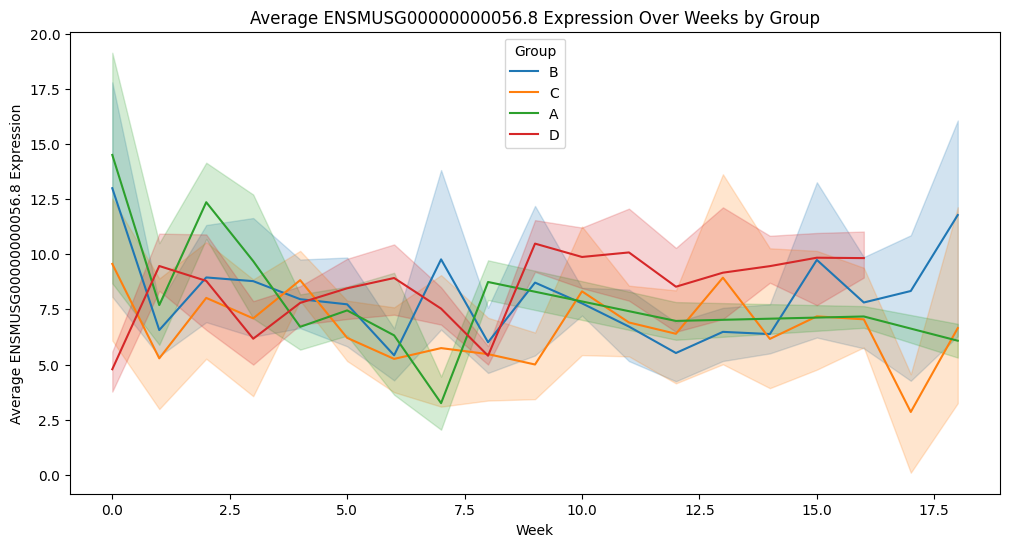

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
variable = 'ENSMUSG00000000056.8'
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y=f'{variable}', hue='Group')

# Add title and labels
plt.title(f'Average {variable} Expression Over Weeks by Group')
plt.xlabel('Week')
plt.ylabel(f'Average {variable} Expression')

# Show the plot
plt.show()

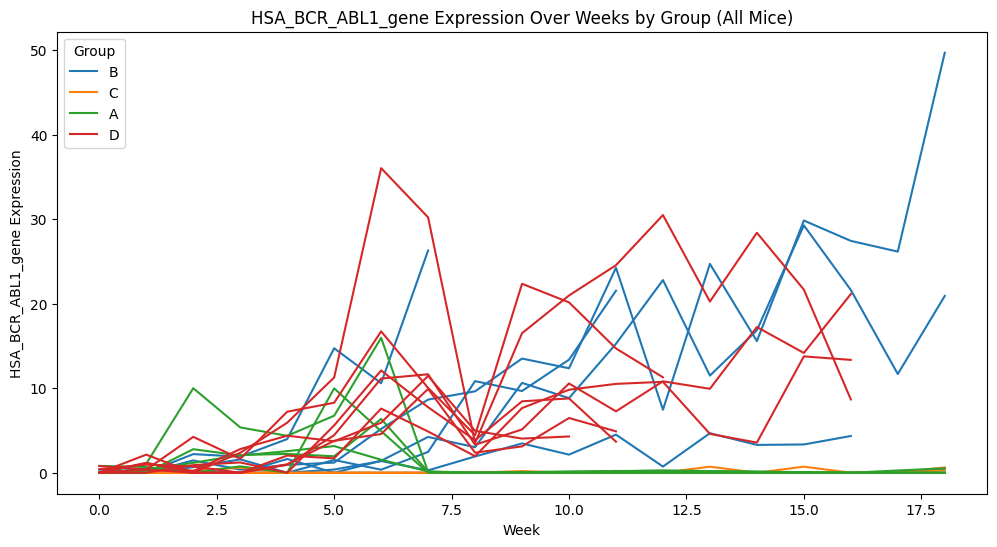

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y='HSA_BCR_ABL1_gene', hue='Group', units='mouse_id', estimator=None)

# Add title and labels
plt.title('HSA_BCR_ABL1_gene Expression Over Weeks by Group (All Mice)')
plt.xlabel('Week')
plt.ylabel('HSA_BCR_ABL1_gene Expression')

# Show the plot
plt.show()

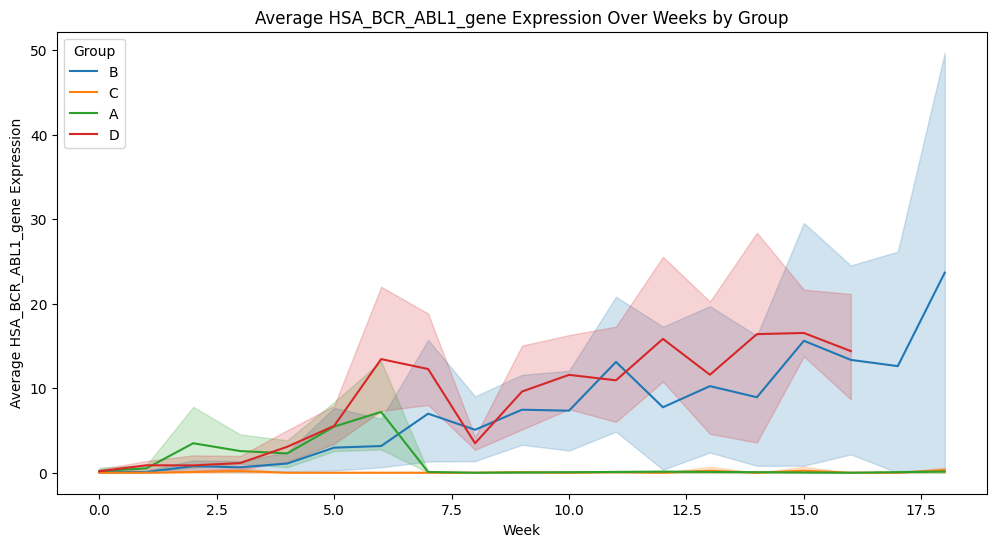

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y='HSA_BCR_ABL1_gene', hue='Group')

# Add title and labels
plt.title('Average HSA_BCR_ABL1_gene Expression Over Weeks by Group')
plt.xlabel('Week')
plt.ylabel('Average HSA_BCR_ABL1_gene Expression')

# Show the plot
plt.show()

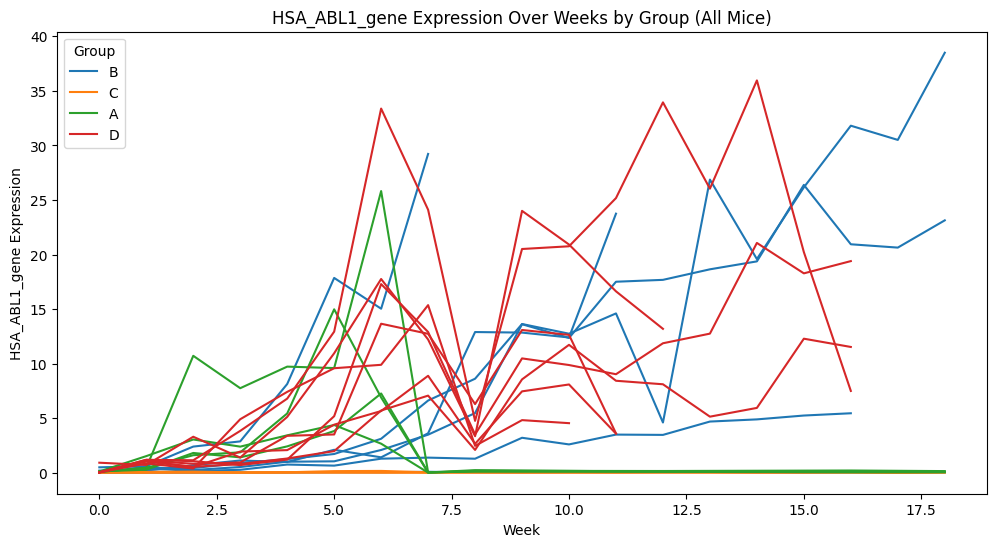

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y='HSA_ABL1_gene', hue='Group', units='mouse_id', estimator=None)

# Add title and labels
plt.title('HSA_ABL1_gene Expression Over Weeks by Group (All Mice)')
plt.xlabel('Week')
plt.ylabel('HSA_ABL1_gene Expression')

# Show the plot
plt.show()

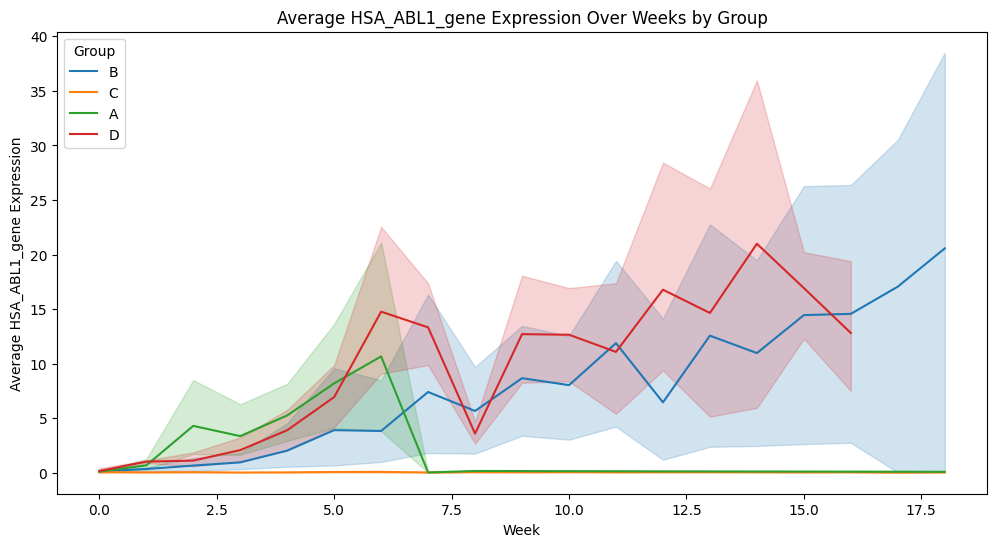

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y='HSA_ABL1_gene', hue='Group')

# Add title and labels
plt.title('Average HSA_ABL1_gene Expression Over Weeks by Group')
plt.xlabel('Week')
plt.ylabel('Average HSA_ABL1_gene Expression')

# Show the plot
plt.show()

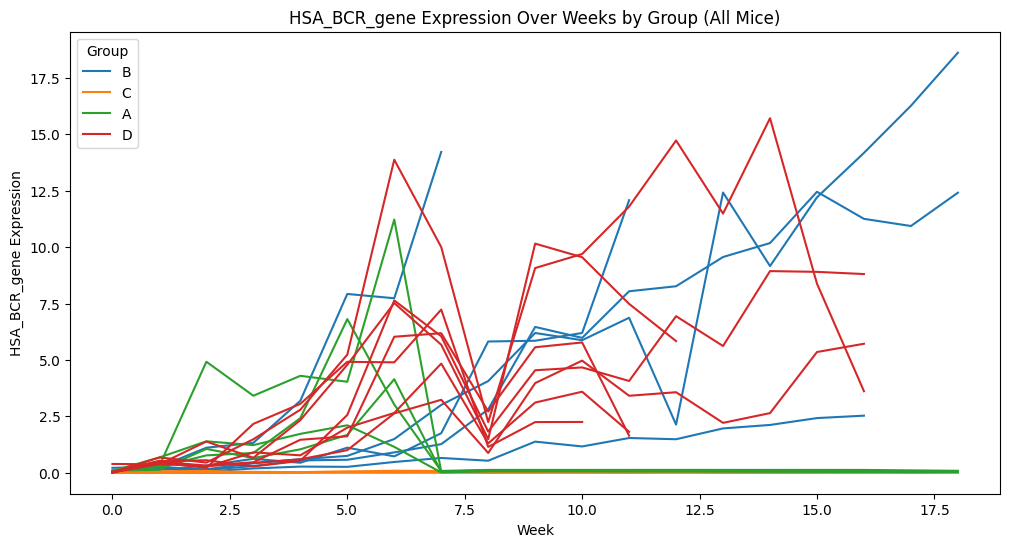

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y='HSA_BCR_gene', hue='Group', units='mouse_id', estimator=None)

# Add title and labels
plt.title('HSA_BCR_gene Expression Over Weeks by Group (All Mice)')
plt.xlabel('Week')
plt.ylabel('HSA_BCR_gene Expression')

# Show the plot
plt.show()

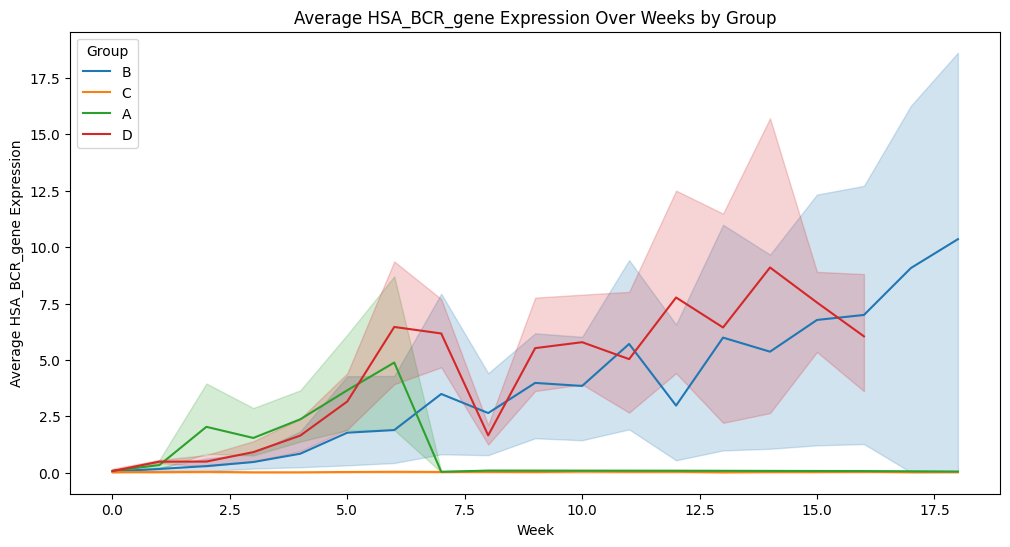

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y='HSA_BCR_gene', hue='Group')

# Add title and labels
plt.title('Average HSA_BCR_gene Expression Over Weeks by Group')
plt.xlabel('Week')
plt.ylabel('Average HSA_BCR_gene Expression')

# Show the plot
plt.show()

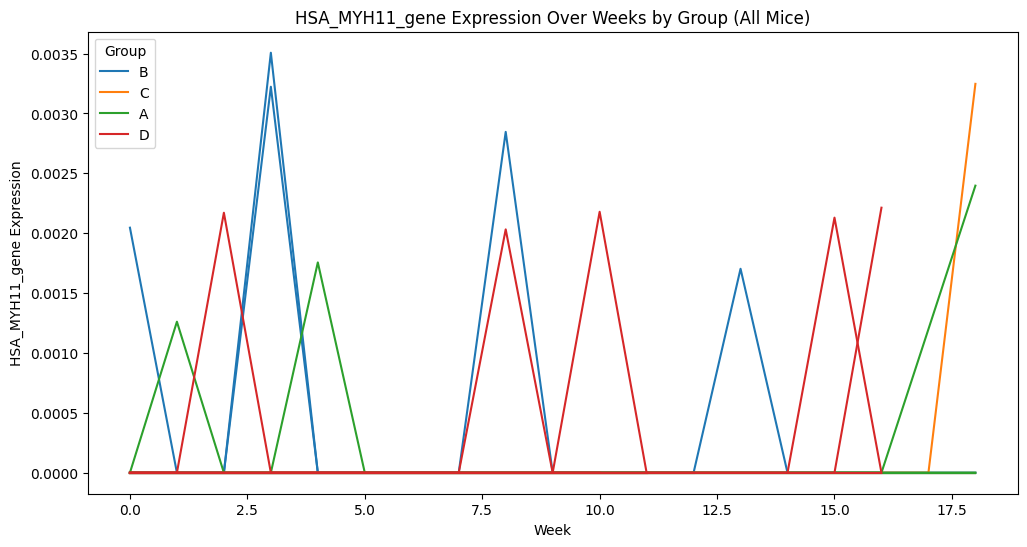

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y='HSA_MYH11_gene', hue='Group', units='mouse_id', estimator=None)

# Add title and labels
plt.title('HSA_MYH11_gene Expression Over Weeks by Group (All Mice)')
plt.xlabel('Week')
plt.ylabel('HSA_MYH11_gene Expression')

# Show the plot
plt.show()

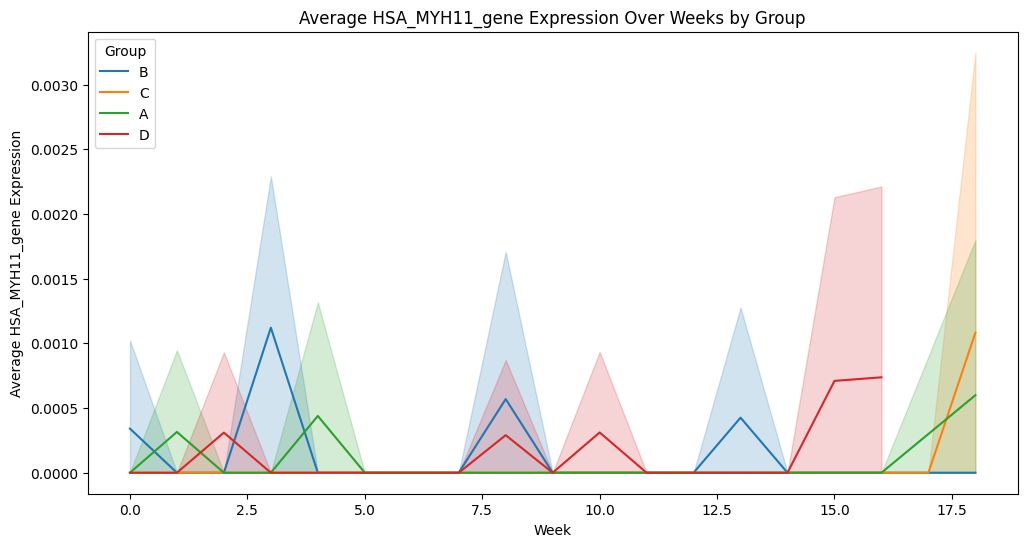

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y='HSA_MYH11_gene', hue='Group')

# Add title and labels
plt.title('Average HSA_MYH11_gene Expression Over Weeks by Group')
plt.xlabel('Week')
plt.ylabel('Average HSA_MYH11_gene Expression')

# Show the plot
plt.show()

# Pivot

In [ ]:
import pandas as pd
df = pd.read_csv('final_data.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'ENSMUSG00000000001.5', 'ENSMUSG00000000028.16',
       'ENSMUSG00000000056.8', 'ENSMUSG00000000078.8', 'ENSMUSG00000000085.17',
       'ENSMUSG00000000088.8', 'ENSMUSG00000000120.7', 'ENSMUSG00000000127.16',
       'ENSMUSG00000000131.16',
       ...
       'ENSMUSG00002076971.1', 'ENSMUSG00002076983.1', 'ENSMUSG00002076986.1',
       'HSA_ABL1_gene', 'HSA_BCR_ABL1_gene', 'HSA_BCR_gene', 'HSA_MYH11_gene',
       'Week', 'Group', 'mouse_id'],
      dtype='object', length=14609)

In [ ]:
df = df[['HSA_BCR_ABL1_gene','Week', 'mouse_id']]

In [ ]:
df

,HSA_BCR_ABL1_gene,Week,mouse_id
0,0.371110,0,480
1,0.000000,1,480
2,1.453523,2,480
3,0.367892,3,480
4,0.930028,4,480
...,...,...,...
293,9.920183,7,513
294,2.374633,8,513
295,3.114273,9,513
296,6.473934,10,513


In [ ]:
'''
# Pivot the DataFrame
df_pivot = df.pivot(index='mouse_id', columns='Week', values='HSA_BCR_ABL1_gene')

df_pivot.to_csv('temporal_df.csv')'''

# final model

In [3]:
import pandas as pd
df = pd.read_csv('temporal_df.csv')

In [4]:
df.shape

(20, 20)

In [5]:
df.columns

Index(['mouse_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18'],
      dtype='object')

In [7]:
df.head(20)

,mouse_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,476,0.000000,0.000000,2.781947,2.037780,2.551139,3.155107,1.538886,0.155031,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000
1,477,0.000000,0.000000,2.201708,1.903192,3.980414,14.726313,10.593090,26.296667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,480,0.371110,0.000000,1.453523,0.367892,0.930028,1.197140,5.188656,8.654403,9.633098,13.507033,12.361609,24.256600,7.454157,24.711301,15.575913,29.844325,27.431863,26.164286,49.698313
3,482,0.000000,0.298841,1.173101,2.095745,2.224623,1.942318,6.367342,0.114728,0.000000,NaN,NaN,NaN,0.236009,NaN,NaN,NaN,0.000000,NaN,0.000000
4,483,0.000000,1.075266,10.000239,5.363364,4.367664,6.747081,15.963488,0.084505,0.000000,NaN,NaN,NaN,0.259903,NaN,NaN,NaN,0.000000,NaN,0.000000
5,484,0.000000,0.000000,0.659892,1.576623,0.000000,1.508784,0.358167,2.461466,10.839476,9.669050,13.378494,21.533573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,487,0.000000,0.000000,0.148033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103556,0.000000,0.000000,0.000000,0.000000,0.408522
7,488,0.000000,0.000000,0.252827,0.588352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221796,0.000000,0.000000,0.000000,0.715976,0.000000,0.000000,0.276631
8,489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198313,0.000000,0.000000,0.000000,0.714577,0.000000,0.000000,0.000000,0.000000,0.631860


In [ ]:
df = df.fillna(-1)
df

,mouse_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,476,0.000000,0.000000,2.781947,2.037780,2.551139,3.155107,1.538886,0.155031,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
1,477,0.000000,0.000000,2.201708,1.903192,3.980414,14.726313,10.593090,26.296667,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,480,0.371110,0.000000,1.453523,0.367892,0.930028,1.197140,5.188656,8.654403,9.633098,13.507033,12.361609,24.256600,7.454157,24.711301,15.575913,29.844325,27.431863,26.164286,49.698313
3,482,0.000000,0.298841,1.173101,2.095745,2.224623,1.942318,6.367342,0.114728,0.000000,-1.000000,-1.000000,-1.000000,0.236009,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
4,483,0.000000,1.075266,10.000239,5.363364,4.367664,6.747081,15.963488,0.084505,0.000000,-1.000000,-1.000000,-1.000000,0.259903,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
5,484,0.000000,0.000000,0.659892,1.576623,0.000000,1.508784,0.358167,2.461466,10.839476,9.669050,13.378494,21.533573,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
6,487,0.000000,0.000000,0.148033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103556,0.000000,0.000000,0.000000,0.000000,0.408522
7,488,0.000000,0.000000,0.252827,0.588352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221796,0.000000,0.000000,0.000000,0.715976,0.000000,0.000000,0.276631
8,489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198313,0.000000,0.000000,0.000000,0.714577,0.000000,0.000000,0.000000,0.000000,0.631860


In [ ]:
l = [483, 541, 488, 502 ]

df_true = df[df['mouse_id'].isin(l)]
df_true = df_true.reset_index()
df_true

,index,mouse_id,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,4,483,0.00000,1.075266,10.000239,5.363364,4.367664,6.747081,15.963488,0.084505,...,-1.000000,-1.000000,-1.000000,0.259903,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
1,7,488,0.00000,0.000000,0.252827,0.588352,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.221796,0.000000,0.000000,0.000000,0.715976,0.000000,0.000000,0.276631
2,10,502,0.41344,0.952424,0.741975,0.000000,0.935762,4.442935,11.145107,11.645266,...,5.119940,10.558504,7.265331,10.813254,9.931807,17.240786,14.173148,21.145336,-1.000000,-1.000000
3,17,541,0.00000,0.502568,0.000000,0.000000,1.625322,0.000000,1.412823,4.233016,...,10.632433,8.826080,15.257337,22.795216,11.495405,16.860772,29.270700,21.622389,11.678586,20.921539


In [ ]:
df_train = df[~df['mouse_id'].isin(l)]
df_train = df_train.reset_index(drop=True)

In [ ]:
import numpy as np

df_test = df_true.reset_index(drop=True)

# Randomly remove 10% of values (excluding mouse_id column)
# Set random seed for reproducibility (optional)
np.random.seed(42)

# Get all columns except mouse_id
value_columns = [col for col in df_test.columns if col != 'mouse_id']

# Create a mask for values to remove (10% of all values)
for col in value_columns:
    # Create random mask: True means keep, False means remove (set to NaN)
    mask = np.random.random(len(df_true)) > 0.1
    df_test.loc[~mask, col] = np.nan

print(f"\nResulting dataframe shape: {df_test.shape}")
print(f"\nDataframe preview:\n{df_test.head()}")


Resulting dataframe shape: (4, 21)

Dataframe preview:
   index  mouse_id    0         1          2         3         4         5  \
0    4.0       483  0.0  1.075266  10.000239  5.363364  4.367664  6.747081   
1    7.0       488  0.0  0.000000   0.252827  0.588352  0.000000  0.000000   
2   10.0       502  NaN       NaN   0.741975  0.000000  0.935762  4.442935   
3   17.0       541  0.0  0.502568   0.000000  0.000000  1.625322  0.000000   

           6          7  ...          9         10         11         12  \
0  15.963488        NaN  ...  -1.000000  -1.000000  -1.000000   0.259903   
1        NaN   0.000000  ...   0.000000   0.000000   0.221796   0.000000   
2  11.145107  11.645266  ...        NaN  10.558504   7.265331  10.813254   
3   1.412823   4.233016  ...  10.632433   8.826080  15.257337  22.795216   

          13         14         15         16         17         18  
0        NaN  -1.000000  -1.000000        NaN        NaN   0.000000  
1   0.000000   0.000000   0.7159

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare the data for imputation
def create_lag_features(df, max_lag=18):
    """Create lag features for time series imputation"""
    df_impute = df.copy()
    value_columns = [col for col in df.columns if col != 'mouse_id' and col != 'index']

    # Create lag features
    for lag in range(1, max_lag + 1):
        for col in value_columns:
            df_impute[f'{col}_lag_{lag}'] = df_impute[col].shift(lag)

    return df_impute

# Prepare training data (complete cases only from df_train)
df_train_complete = df_train.dropna()
print(f"Training samples with complete data: {len(df_train_complete)}")

# Create lag features for training data
df_train_lagged = create_lag_features(df_train_complete)
df_test_lagged = create_lag_features(df_test)

# Get common columns (excluding mouse_id and index)
common_cols = [col for col in df_train_lagged.columns
               if col in df_test_lagged.columns and col not in ['mouse_id', 'index']]

# Prepare X_train and X_test
X_train = df_train_lagged[common_cols]
X_test = df_test_lagged[common_cols]

# Initialize and fit iterative imputer
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=40,
    initial_strategy='mean',
    random_state=42
)

print("Fitting imputer on training data...")
imputer.fit(X_train)

print("Imputing missing values in test data...")
X_test_imputed = imputer.transform(X_test)

# Create dataframe with imputed values
df_test_imputed = df_test.copy()
value_columns = [col for col in df_test.columns if col != 'mouse_id' and col != 'index']

# Update only the original value columns with imputed values
imputed_array = X_test_imputed[:, :len(value_columns)]
df_test_imputed[value_columns] = imputed_array

print("\nImputation completed!")
print(f"Original missing values in test data: {df_test[value_columns].isna().sum().sum()}")
print(f"Remaining missing values after imputation: {df_test_imputed[value_columns].isna().sum().sum()}")

# Calculate accuracy - ADDED THIS ONE LINE
missing_mask = df_test[value_columns].isna()
mae = mean_absolute_error(df_true[value_columns].values[missing_mask], df_test_imputed[value_columns].values[missing_mask])
print(f"Imputation accuracy (MAE): {mae:.4f}")

Training samples with complete data: 16


/tmp/ipython-input-198344143.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_impute[f'{col}_lag_{lag}'] = df_impute[col].shift(lag)
/tmp/ipython-input-198344143.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_impute[f'{col}_lag_{lag}'] = df_impute[col].shift(lag)
/tmp/ipython-input-198344143.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Fitting imputer on training data...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Imputing missing values in test data...

Imputation completed!
Original missing values in test data: 11
Remaining missing values after imputation: 0
Imputation accuracy (MAE): 1.8076


# Ananany code.


In [ ]:
import numpy as np

df_final.replace(0, np.nan, inplace=True)

<ipython-input-112-480f57f0a035>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final.replace(0, np.nan, inplace=True)


In [ ]:
non_numeric = df_final.select_dtypes(exclude=np.number).columns
print(f"Non-numeric column(s) likely ignored by imputer: {list(non_numeric)}")

Non-numeric column(s) likely ignored by imputer: ['TET_Status', 'Group']


In [ ]:
df_final.isnull().sum()

,0
ENSMUSG00000000001.5,0
ENSMUSG00000000028.16,1
ENSMUSG00000000056.8,0
ENSMUSG00000000078.8,0
ENSMUSG00000000085.17,1
...,...
HSA_BCR_ABL1_gene,112
HSA_BCR_gene,19
HSA_MYH11_gene,284
TET_Status,0


## Approach -  Creating separate sequences for combinations of control groups and TET status for accurate imputation.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split # Although we split manually by time
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [ ]:

N_GENES_REDUCED = 50
SEQUENCE_LENGTH = 5      # Weeks per sequence
BATCH_SIZE = 32          # Batches per training step

rem_cols = ['Group', 'TET_Status','ENSMUSG00000064880.3']

gene_cols = df_final.columns.drop(rem_cols)
print(f"Identified {len(gene_cols)} gene columns.")



Identified 14604 gene columns.


In [ ]:
gene_cols

Index(['ENSMUSG00000000001.5', 'ENSMUSG00000000028.16', 'ENSMUSG00000000056.8',
       'ENSMUSG00000000078.8', 'ENSMUSG00000000085.17', 'ENSMUSG00000000088.8',
       'ENSMUSG00000000120.7', 'ENSMUSG00000000127.16',
       'ENSMUSG00000000131.16', 'ENSMUSG00000000134.18',
       ...
       'ENSMUSG00002076937.1', 'ENSMUSG00002076954.1', 'ENSMUSG00002076958.1',
       'ENSMUSG00002076971.1', 'ENSMUSG00002076983.1', 'ENSMUSG00002076986.1',
       'HSA_ABL1_gene', 'HSA_BCR_ABL1_gene', 'HSA_BCR_gene', 'HSA_MYH11_gene'],
      dtype='object', length=14604)

In [ ]:
n = len(df_final)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

df_train = df_final.iloc[:train_end].copy()
df_val = df_final.iloc[train_end:val_end].copy()
df_test = df_final.iloc[val_end:].copy()

print(f"Train shape: {df_train.shape}")
print(f"Validation shape: {df_val.shape}")
print(f"Test shape: {df_test.shape}")

Train shape: (208, 14607)
Validation shape: (45, 14607)
Test shape: (45, 14607)


This is to store the original mask value location

In [ ]:
train_nan_mask_orig = df_train[gene_cols].isnull()
val_nan_mask_orig = df_val[gene_cols].isnull()
test_nan_mask_orig = df_test[gene_cols].isnull()
print(f"Original NaNs in Train Genes: {train_nan_mask_orig.sum().sum()}")

Original NaNs in Train Genes: 132920


Out of total 4352290 gene expression data, we have 133128 missing values for which we are doing imputation.

In [ ]:
df_train[gene_cols].shape


(208, 14604)

In [ ]:

imputer_mean = SimpleImputer(strategy='mean')
imputer_mean.fit(df_train[gene_cols]) # Fit only on train

# Apply imputation to train, val, test gene columns
df_train_genes_imp = pd.DataFrame(imputer_mean.transform(df_train[gene_cols]), index=df_train.index, columns=gene_cols)
df_val_genes_imp = pd.DataFrame(imputer_mean.transform(df_val[gene_cols]), index=df_val.index, columns=gene_cols)
df_test_genes_imp = pd.DataFrame(imputer_mean.transform(df_test[gene_cols]), index=df_test.index, columns=gene_cols)

print("Temporary imputation complete.")
print(f"NaNs after temp imputation (Train): {df_train_genes_imp.isnull().sum().sum()}") # Should be 0

Temporary imputation complete.
NaNs after temp imputation (Train): 0


In [ ]:


N_FEATURES_SELECT = 50

# --- 4a. Feature Selection based on Variance ---
print(f"Selecting top {N_FEATURES_SELECT} features based on variance in training data...")

# Calculate variance for each gene in the imputed training data
variances = df_train_genes_imp.var()

# Get the names of the top N genes with the highest variance
top_feature_cols = variances.nlargest(N_FEATURES_SELECT).index.tolist()

print(f"Selected {len(top_feature_cols)} features.")
# print("Top features:", top_feature_cols) # Uncomment to see the list

# --- 4b. Subset DataFrames to Selected Features ---
df_train_genes_selected = df_train_genes_imp[top_feature_cols]
df_val_genes_selected = df_val_genes_imp[top_feature_cols]
df_test_genes_selected = df_test_genes_imp[top_feature_cols]

print(f"Subsetted Training Genes shape: {df_train_genes_selected.shape}")

# --- 4c. Apply PCA to Selected Features ---
print(f"\nApplying PCA to the selected {N_FEATURES_SELECT} features...")
pca = PCA(n_components=N_FEATURES_SELECT)

# Fit PCA ONLY on the selected training gene data
pca.fit(df_train_genes_selected)

# Transform train, val, test selected gene data
train_pca = pca.transform(df_train_genes_selected)
val_pca = pca.transform(df_val_genes_selected)
test_pca = pca.transform(df_test_genes_selected)

# Store PCA results in DataFrames
train_pca_df = pd.DataFrame(train_pca, index=df_train.index, columns=top_feature_cols)
val_pca_df = pd.DataFrame(val_pca, index=df_val.index, columns=top_feature_cols)
test_pca_df = pd.DataFrame(test_pca, index=df_test.index, columns=top_feature_cols)

print("PCA transformation complete on selected features.")
print(f"Train PCA shape: {train_pca_df.shape}")

Selecting top 50 features based on variance in training data...
Selected 50 features.
Subsetted Training Genes shape: (208, 50)

Applying PCA to the selected 50 features...
PCA transformation complete on selected features.
Train PCA shape: (208, 50)


Preparing data for heatmap (using imputed training data for top 50 genes)...
Generating clustermap...


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


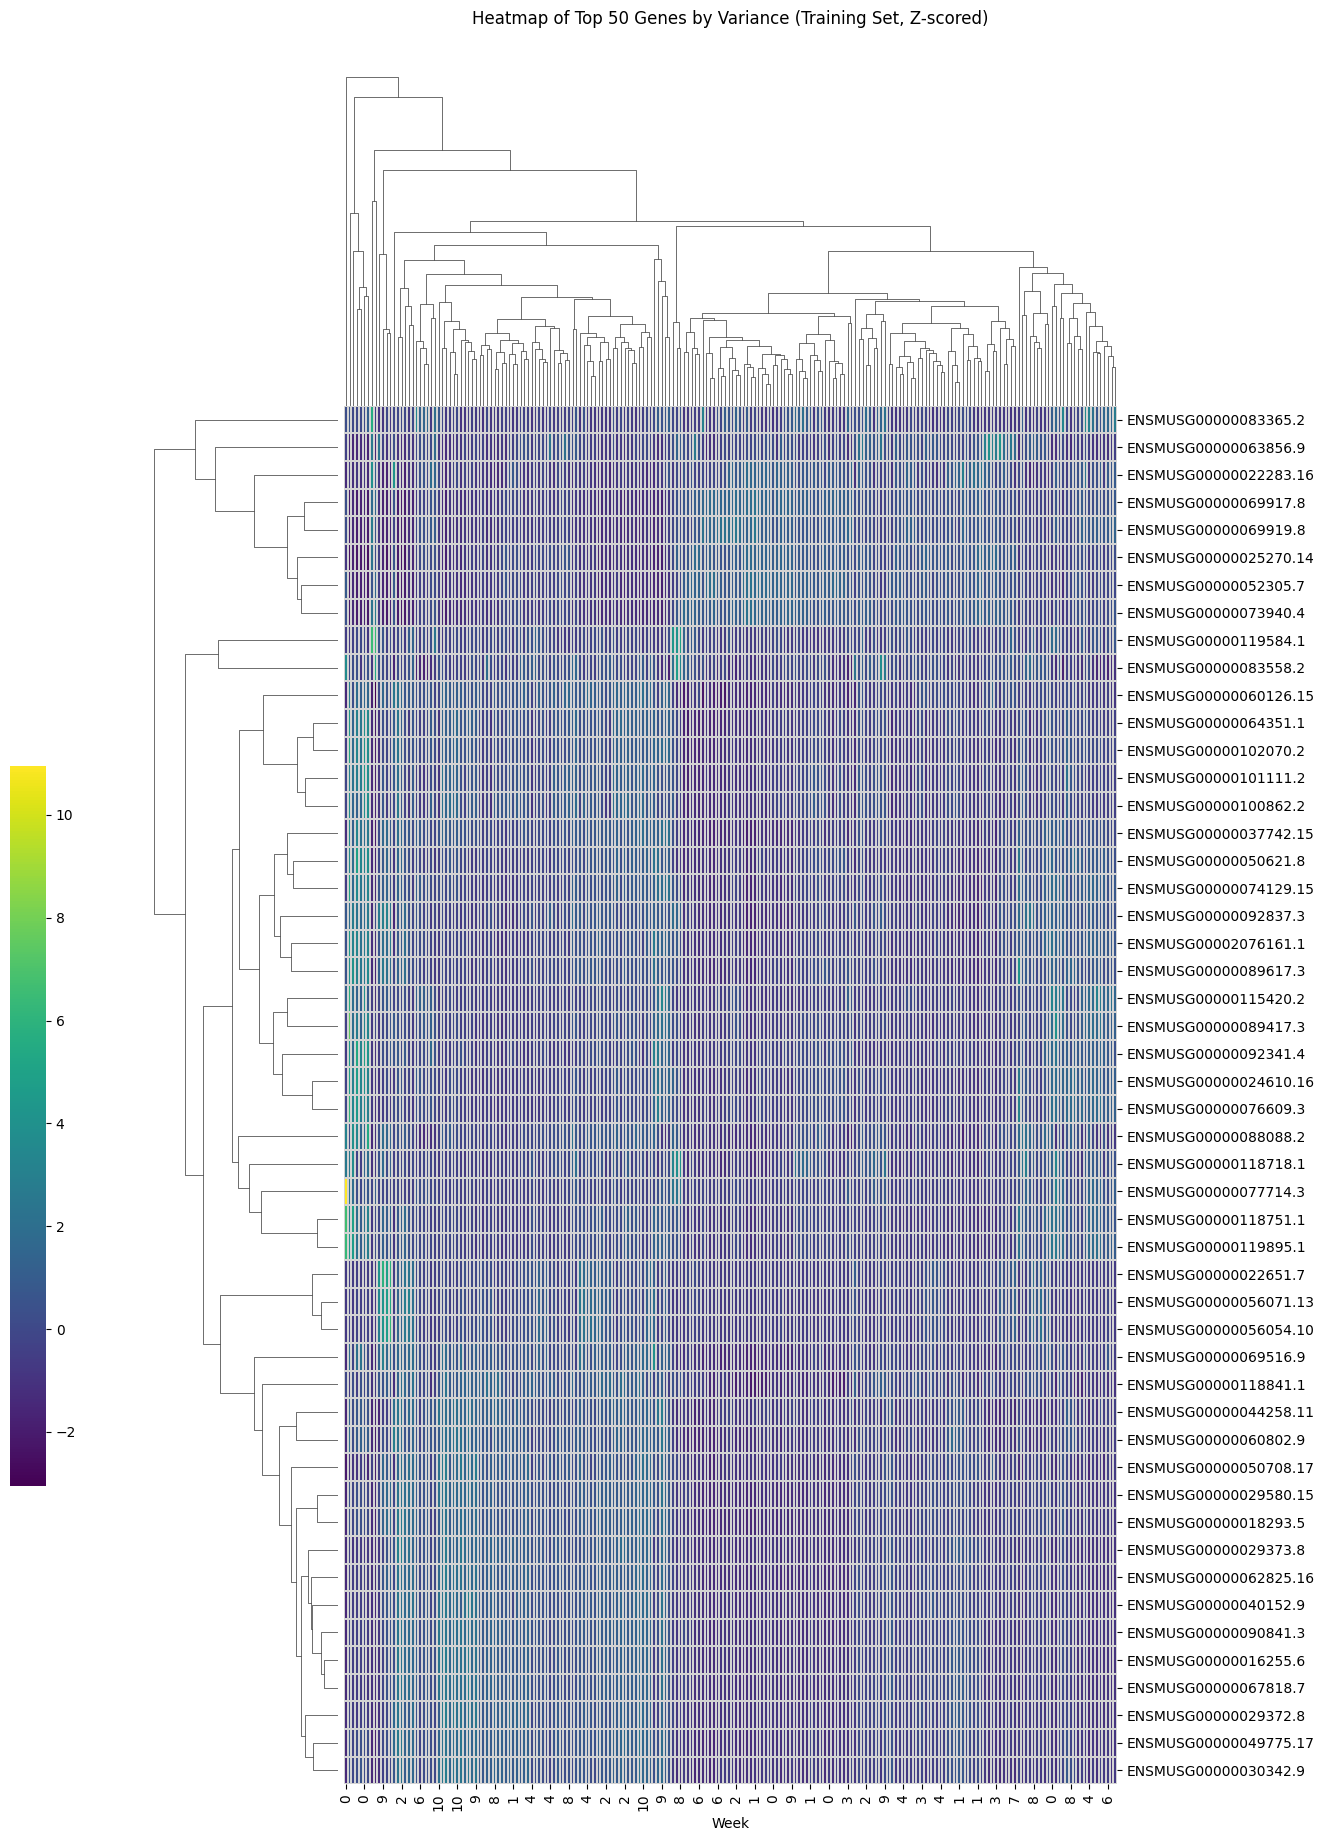

Visualization block finished.


In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


print(f"Preparing data for heatmap (using imputed training data for top {N_FEATURES_SELECT} genes)...")
scaler_viz = StandardScaler()
top_features_scaled_viz = scaler_viz.fit_transform(df_train_genes_selected) # Scale across time for each gene
top_features_scaled_viz_df = pd.DataFrame(top_features_scaled_viz,
                                          index=df_train_genes_selected.index,
                                          columns=top_feature_cols)
print("Generating clustermap...")
try:
    # Transpose so genes are rows, time points are columns
    sns.clustermap(top_features_scaled_viz_df.T,
                   figsize=(12, 18), # Adjust figsize if needed
                   cmap="viridis", # Choose a suitable colormap
                   linewidths=0.1, linecolor='lightgray',
                   dendrogram_ratio=(.2, .2), # Adjust dendrogram sizes
                   cbar_pos=(-0.1, .2, .03, .4)) # Adjust color bar position
    plt.suptitle(f'Heatmap of Top {N_FEATURES_SELECT} Genes by Variance (Training Set, Z-scored)', y=1.02)
    plt.show()
except Exception as e:
    print(f"Could not generate clustermap: {e}")
    print("Consider using a standard heatmap if clustermap fails (e.g., due to data size/variance).")
    # Fallback or alternative: Standard heatmap
    # plt.figure(figsize=(12, 18))
    # sns.heatmap(top_features_scaled_viz_df.T, cmap="viridis", cbar=True)
    # plt.title(f'Heatmap of Top {N_FEATURES_SELECT} Genes by Variance (Training Set, Z-scored)')
    # plt.xlabel("Week")
    # plt.ylabel("Gene")
    # plt.show()

# Optional: Plot individual lines for a few top genes, colored by condition
# This requires merging selected gene data with metadata from df_train
# Example for top 5 genes:
# top_5_genes = top_feature_cols[:5]
# df_train_top5_viz = df_train[top_5_genes + meta_cols].copy()
# df_train_top5_viz_melt = df_train_top5_viz.reset_index().melt(id_vars=['Week', 'Group', 'TET_Status'], var_name='Gene', value_name='Expression')
#
# plt.figure(figsize=(15, 8))
# sns.lineplot(data=df_train_top5_viz_melt, x='Week', y='Expression', hue='Gene', style='TET_Status', size='Group')
# plt.title('Expression of Top 5 Variance Genes Over Time by Condition')
# plt.show()

print("Visualization block finished.")

In [ ]:

scaler_pca = MinMaxScaler(feature_range=(0, 1)) # Scale to [0, 1]

# Fit scaler ONLY on the training PCA components
scaler_pca.fit(train_pca_df)

# Scale train, val, test PCA components
train_pca_scaled = scaler_pca.transform(train_pca_df)
val_pca_scaled = scaler_pca.transform(val_pca_df)
test_pca_scaled = scaler_pca.transform(test_pca_df)

# Store scaled PCA results in DataFrames (these are the imputation targets)
train_targets_df = pd.DataFrame(train_pca_scaled, index=train_pca_df.index, columns=top_feature_cols)
val_targets_df = pd.DataFrame(val_pca_scaled, index=val_pca_df.index, columns=top_feature_cols)
test_targets_df = pd.DataFrame(test_pca_scaled, index=test_pca_df.index, columns=top_feature_cols)

print("PCA scaling complete.")
print(f"Train Targets shape: {train_targets_df.shape}") # Note the new number of columns (N_PCS)

PCA scaling complete.
Train Targets shape: (208, 50)


In [ ]:
# Block 6: One-Hot Encoding Conditions
# (Identical to before - this part doesn't depend on PCA)
print("\n--- Block 6: One-Hot Encoding Categorical Features ---")

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit OHE ONLY on training data metadata

meta_cols = ['Group', 'TET_Status']

ohe.fit(df_train[meta_cols])
condition_feature_names = ohe.get_feature_names_out(meta_cols)
N_COND_FEATURES = len(condition_feature_names)
print(f"Condition features: {condition_feature_names}")

# Transform train, val, test metadata
train_cond_ohe = ohe.transform(df_train[meta_cols])
val_cond_ohe = ohe.transform(df_val[meta_cols])
test_cond_ohe = ohe.transform(df_test[meta_cols])

# Store OHE results in DataFrames
train_cond_df = pd.DataFrame(train_cond_ohe, index=df_train.index, columns=condition_feature_names)
val_cond_df = pd.DataFrame(val_cond_ohe, index=df_val.index, columns=condition_feature_names)
test_cond_df = pd.DataFrame(test_cond_ohe, index=df_test.index, columns=condition_feature_names)

print("One-hot encoding complete.")
print(f"Train Condition Features shape: {train_cond_df.shape}")


--- Block 6: One-Hot Encoding Categorical Features ---
Condition features: ['Group_A' 'Group_B' 'Group_C' 'Group_D' 'TET_Status_TET_OFF'
 'TET_Status_TET_OFF_NIL_ON' 'TET_Status_TET_OFF_ON' 'TET_Status_TET_ON']
One-hot encoding complete.
Train Condition Features shape: (208, 8)


In [ ]:
# Block 7: Combine Features for Model Input (Now using new PCs)
print("\n--- Block 7: Combining Features for Model Input ---")

# Combine Scaled PCs and OHE conditions
train_features_df = pd.concat([train_targets_df, train_cond_df], axis=1) # Use train_targets_df (scaled PCs)
val_features_df = pd.concat([val_targets_df, val_cond_df], axis=1)
test_features_df = pd.concat([test_targets_df, test_cond_df], axis=1)

# --- Add back original metadata for grouping ---
train_features_df[meta_cols] = df_train[meta_cols]
val_features_df[meta_cols] = df_val[meta_cols]
test_features_df[meta_cols] = df_test[meta_cols]

# --- Apply Mask Value based on Original NaNs ---
# This logic needs refinement. Applying mask based on ANY original NaN might be too aggressive.
# Ideally, map NaNs to the specific gene *before* selection/PCA.
# Sticking with approximation: If ANY of the *originally selected top 50 genes*
# had a NaN at a time point, mask the corresponding PC vector.

MASK_VALUE = -1.0 # Ensure MASK_VALUE is defined

# Find rows where *any* of the top 50 genes originally had NaNs
train_mask_rows = df_train[top_feature_cols].isnull().any(axis=1)
val_mask_rows = df_val[top_feature_cols].isnull().any(axis=1)
test_mask_rows = df_test[top_feature_cols].isnull().any(axis=1)

# Apply mask value to the PCA columns (pc_cols) in the FEATURES dataframe
train_features_df.loc[train_mask_rows, top_feature_cols] = MASK_VALUE
val_features_df.loc[val_mask_rows, top_feature_cols] = MASK_VALUE
test_features_df.loc[test_mask_rows, top_feature_cols] = MASK_VALUE

print("Combined feature DataFrames created.")
print(f"Train Features shape: {train_features_df.shape}") # Note the new number of features
print(f"Mask values (-1) count in train PCs: {(train_features_df[top_feature_cols] == MASK_VALUE).sum().sum()}")


--- Block 7: Combining Features for Model Input ---
Combined feature DataFrames created.
Train Features shape: (208, 60)
Mask values (-1) count in train PCs: 1500


In [ ]:
# Block 8: Grouped Sequence Creation Function
# (Identical to the previously corrected version - it uses the passed pc_cols variable)
print("\n--- Block 8: Defining Grouped Sequence Creation Function ---")

def create_grouped_sequences(df_features, df_targets, pc_cols, meta_cols,
                             sequence_length, batch_size, mask_value):
    # ... (Use the exact function definition from the previous successful version) ...
    # Make sure the logic inside correctly uses the passed `pc_cols` list
    # E.g., when creating the feature subset: feature_cols_nn = pc_cols + list(...)
    # E.g., when formatting target in format_seq_to_seq (if needed)
    """
    Creates sequences separately for each Group/TET_Status combination.
    df_features: DataFrame with Week index, scaled PCs (masked), OHE cond, meta_cols
    df_targets: DataFrame with Week index, original scaled PCs (no mask val)
    pc_cols: List of principal component column names
    meta_cols: List of metadata column names ('Group', 'TET_Status')
    sequence_length: Length of input sequences
    batch_size: Batch size for the dataset
    mask_value: The value used for masking (e.g., -1.0)
    """
    all_datasets = []
    n_pcs = len(pc_cols)
    # Define features for NN input: PC columns + OHE condition columns
    ohe_cols = df_features.columns.drop(pc_cols + meta_cols).tolist()
    feature_cols_nn = pc_cols + ohe_cols

    unique_conditions = df_features[meta_cols].drop_duplicates().values
    print(f"Found {len(unique_conditions)} conditions.")

    for group, status in unique_conditions:
        condition_filter = (df_features['Group'] == group) & (df_features['TET_Status'] == status)
        # Select only the features needed for NN input + make sure index is sorted
        df_features_subset = df_features.loc[condition_filter, feature_cols_nn].sort_index()
        # Select corresponding targets
        df_targets_subset = df_targets.loc[condition_filter, pc_cols].sort_index()

        # Check for temporal continuity (optional but recommended)
        week_diff = df_features_subset.index.to_series().diff().dropna()
        if not all(week_diff == 1):
             print(f"Warning: Non-contiguous weeks found in {group}/{status}. Sequences might cross gaps.")

        if len(df_features_subset) < sequence_length:
            print(f"Skipping {group}/{status}: Not enough data ({len(df_features_subset)} points) for sequence length {sequence_length}.")
            continue

        data_nn_subset = df_features_subset.values
        target_nn_subset = df_targets_subset.values

        # Create sequences for this subset
        dataset = tf.keras.utils.timeseries_dataset_from_array(
            data=data_nn_subset,         # Input features (PCs potentially masked, + OHE)
            targets=target_nn_subset,    # Target features (unmasked PCs)
            sequence_length=sequence_length,
            sequence_stride=1,
            shuffle=False,
            batch_size=batch_size
        )
        # Corrected format_seq_to_seq function:
        def format_seq_to_seq(features, targets_default): # targets_default is ignored now
             """ Ensure target shape is (Batch, Sequence Length, N_PCs) by extracting from features."""
             # The actual target for reconstruction is the PC part of the input feature sequence
             # features shape: (Batch, SeqLen, N_PCs + N_Cond)
             # We slice the first N_PCS features across the sequence length dimension
             target_pcs_sequence = features[:, :, :n_pcs] # n_pcs must be defined in the outer scope
             return features, target_pcs_sequence

        dataset = dataset.map(format_seq_to_seq, num_parallel_calls=tf.data.AUTOTUNE)
        all_datasets.append(dataset)

    if not all_datasets:
        raise ValueError("No datasets were created. Check data length per condition.")

    print(f"Created {len(all_datasets)} individual datasets.")

    # Concatenate datasets
    if len(all_datasets) == 1:
        combined_dataset = all_datasets[0]
    else:
        combined_dataset = all_datasets[0]
        for ds in all_datasets[1:]:
            combined_dataset = combined_dataset.concatenate(ds)

    # Prefetch for performance
    combined_dataset = combined_dataset.prefetch(tf.data.AUTOTUNE)

    return combined_dataset


--- Block 8: Defining Grouped Sequence Creation Function ---


In [ ]:
# Block 9: Generating the Final Datasets (Now using features derived from top 50 genes)
print("\n--- Block 9: Generating Final Datasets for Training ---")

# Ensure the target dataframes contain the *original* scaled PCA values (no mask value)
# Ensure the feature dataframes contain the scaled PCA values *with* the mask value (-1) applied

train_ds_final = create_grouped_sequences(
    df_features=train_features_df, # Includes masked PCs, OHE, and Meta cols
    df_targets=train_targets_df,   # Includes *unmasked* scaled PCs
    pc_cols=top_feature_cols,               # Updated list of PC column names
    meta_cols=meta_cols,
    sequence_length=SEQUENCE_LENGTH,
    batch_size=BATCH_SIZE,
    mask_value=MASK_VALUE
)

val_ds_final = create_grouped_sequences(
    df_features=val_features_df,
    df_targets=val_targets_df,
    pc_cols=top_feature_cols,
    meta_cols=meta_cols,
    sequence_length=SEQUENCE_LENGTH,
    batch_size=BATCH_SIZE,
    mask_value=MASK_VALUE
)

# Optional: Create test dataset if needed
# test_ds_final = create_grouped_sequences(...)

print("\nFinal tf.data.Dataset objects created successfully.")

# Inspect a batch:
print("\nExample batch from training dataset:")
for features, targets in train_ds_final.take(1):
    print("Features batch shape:", features.shape) # Should reflect N_PCS + N_COND_FEATURES
    print("Targets batch shape:", targets.shape)   # Should reflect N_PCS
    print("Mask value (-1) in features batch:", np.any(features.numpy()[:, :, :50] == MASK_VALUE)) # Check only PC part
    print("NaNs in features batch:", np.any(np.isnan(features.numpy())))
    print("NaNs in targets batch:", np.any(np.isnan(targets.numpy())))


--- Block 9: Generating Final Datasets for Training ---
Found 4 conditions.
Created 4 individual datasets.
Found 4 conditions.
Skipping A/TET_OFF_ON: Not enough data (4 points) for sequence length 5.
Created 3 individual datasets.

Final tf.data.Dataset objects created successfully.

Example batch from training dataset:
Features batch shape: (32, 5, 58)
Targets batch shape: (32, 5, 50)
Mask value (-1) in features batch: True
NaNs in features batch: False
NaNs in targets batch: False


In [ ]:
# Block 10: Build LSTM Autoencoder Model
print("\n--- Block 10: Building the LSTM Autoencoder Model ---")

import tensorflow as tf
from tensorflow import keras

# Clear previous session (optional, good practice in notebooks)
keras.backend.clear_session()

# Model Hyperparameters (adjust as needed)
LSTM_UNITS_1 = 128 # Number of units in the first LSTM layer
LSTM_UNITS_2 = 64  # Number of units in the second LSTM layer (bottleneck)
n_total_features = 58
N_PCS = 50
# --- Define Model Inputs ---
# Shape: (batch, sequence_length, n_total_features)
encoder_inputs = keras.Input(shape=(SEQUENCE_LENGTH, n_total_features), name='encoder_input')

# --- Masking Layer ---
# Ignores timesteps where all features are MASK_VALUE
masked_inputs = keras.layers.Masking(mask_value=MASK_VALUE, name='masking_layer')(encoder_inputs)

# --- Encoder ---
# First LSTM layer
encoder_lstm1 = keras.layers.LSTM(LSTM_UNITS_1, return_sequences=True, name='encoder_lstm_1')(masked_inputs)
# Second LSTM layer (bottleneck). return_sequences=False to get the final context vector
encoder_lstm2, state_h, state_c = keras.layers.LSTM(LSTM_UNITS_2, return_sequences=False, return_state=True, name='encoder_lstm_2')(encoder_lstm1)
encoder_states = [state_h, state_c] # Store encoder states if needed for advanced decoders

# --- Repeat Vector ---
# Repeats the final context vector (output of encoder_lstm2) for each timestep of the output sequence
repeat_vector = keras.layers.RepeatVector(SEQUENCE_LENGTH, name='repeat_vector')(encoder_lstm2)

# --- Decoder ---
# Decoder needs to reconstruct the sequence. Must have return_sequences=True
# We can optionally initialize the decoder state with the encoder state for potentially better performance
decoder_lstm1 = keras.layers.LSTM(LSTM_UNITS_2, return_sequences=True, name='decoder_lstm_1')(repeat_vector) #, initial_state=encoder_states) # Optional state passing
decoder_lstm2 = keras.layers.LSTM(LSTM_UNITS_1, return_sequences=True, name='decoder_lstm_2')(decoder_lstm1)

# --- Output Layer ---
# Apply a Dense layer to each timestep independently to get the reconstructed PCs
# Output shape: (batch, sequence_length, N_PCS)
output_layer = keras.layers.TimeDistributed(
    keras.layers.Dense(N_PCS, activation=None), name='output_pcs' # Linear activation for regression
)(decoder_lstm2)

# --- Create the Model ---
model = keras.Model(inputs=encoder_inputs, outputs=output_layer, name='lstm_autoencoder')

# Display model summary
model.summary()


--- Block 10: Building the LSTM Autoencoder Model ---


Model: "lstm_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 5, 58)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 5, 58)     │          0 │ encoder_input[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_layer       │ (None, 5, 58)     │          0 │ encoder_input[0]… │
│ (Masking)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any (Any)           │ (None, 5)         │          0 │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm_1      │ (None, 5, 128)    │     95,744 │ masking_layer[0]… │
│ (LSTM)              │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm_2      │ [(None, 64),      │     49,408 │ encoder_lstm_1[0… │
│ (LSTM)              │ (None, 64),       │            │ any[0][0]         │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 5, 64)     │          0 │ encoder_lstm_2[0… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm_1      │ (None, 5, 64)     │     33,024 │ repeat_vector[0]… │
│ (LSTM)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm_2      │ (None, 5, 128)    │     98,816 │ decoder_lstm_1[0… │
│ (LSTM)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_pcs          │ (None, 5, 50)     │      6,450 │ decoder_lstm_2[0… │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 283,442 (1.08 MB)

 Trainable params: 283,442 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Block 11: Compile the Model
print("\n--- Block 11: Compiling the Model ---")

# Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001) # Adjust learning rate if needed

# Loss Function - Mean Squared Error is suitable for reconstruction
loss = keras.losses.MeanSquaredError()

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=[keras.metrics.MeanAbsoluteError()]) # Add MAE as metric

print("Model compiled successfully.")


--- Block 11: Compiling the Model ---
Model compiled successfully.


In [ ]:
# Block 12: Define Callbacks
print("\n--- Block 12: Defining Callbacks ---")

# Early Stopping: Stop training if validation loss doesn't improve
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=15,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # Restore model weights from the epoch with the best val_loss
    verbose=1
)

# Model Checkpoint: Save the best model weights separately
# Define a path to save the best model
checkpoint_path = "lstm_autoencoder_best.keras" # or .h5
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True, # Only save when val_loss improves
    save_weights_only=False, # Set to True if you only want weights
    verbose=1
)

# Reduce Learning Rate on Plateau: Reduce LR if val_loss stops improving
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=5,  # Number of epochs with no improvement after which learning rate will be reduced.
    min_lr=1e-6, # Lower bound on the learning rate.
    verbose=1
)

# Combine callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr]

print("Callbacks defined.")


--- Block 12: Defining Callbacks ---
Callbacks defined.



--- Block 13: Training the Model ---
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3913 - mean_absolute_error: 0.5776
Epoch 1: val_loss improved from inf to 0.56166, saving model to lstm_autoencoder_best.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - loss: 0.3875 - mean_absolute_error: 0.5744 - val_loss: 0.5617 - val_mean_absolute_error: 0.5493 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3402 - mean_absolute_error: 0.4983
Epoch 2: val_loss improved from 0.56166 to 0.49897, saving model to lstm_autoencoder_best.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.3351 - mean_absolute_error: 0.4919 - val_loss: 0.4990 - val_mean_absolute_error: 0.4305 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3160 - mean_absolute_error: 0.4180
Epoch 3: val_loss improved from 0.49897 to 0.48153, saving model to lstm_autoencoder_best.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.3106 - mean_absolute_er

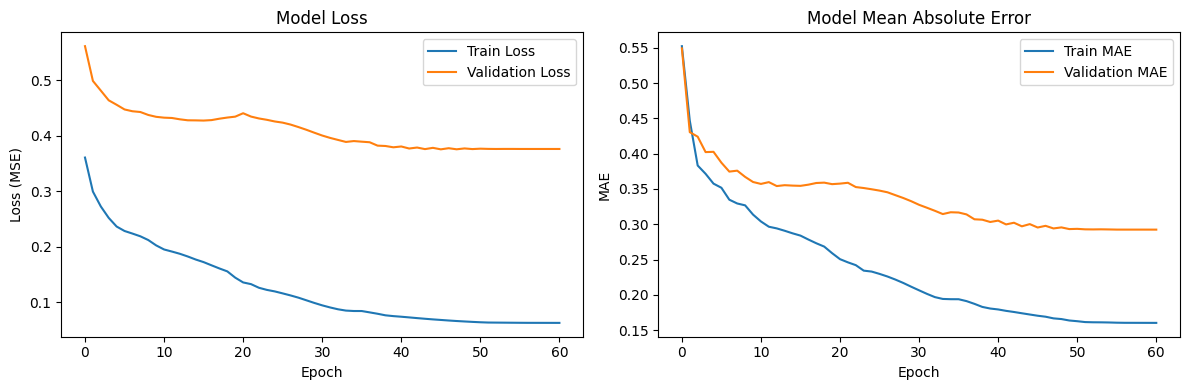

In [ ]:
# Block 13: Train the Model
print("\n--- Block 13: Training the Model ---")

EPOCHS = 100 # Set desired number of epochs (EarlyStopping will likely stop it sooner)

# Check if datasets exist
if 'train_ds_final' not in locals() or 'val_ds_final' not in locals():
     raise NameError("Training/Validation datasets (train_ds_final, val_ds_final) not found. Ensure previous blocks were run.")

# Start training
history = model.fit(
    train_ds_final,
    epochs=EPOCHS,
    validation_data=val_ds_final,
    callbacks=callbacks_list,
    verbose=1 # Set to 1 or 2 for progress updates, 0 for silent
)

print("\nTraining finished.")

# Optional: Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss (MSE)')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    # Plot training & validation MAE values (if MAE was included as a metric)
    if 'mean_absolute_error' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mean_absolute_error'], label='Train MAE')
        plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
        plt.title('Model Mean Absolute Error')
        plt.ylabel('MAE')
        plt.xlabel('Epoch')
        plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(history)


--- Block 14: Preparing Validation Set for Imputation Evaluation ---


NameError: name 'val_targets_df' is not defined